In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

%matplotlib inline

In [2]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/projects/btl2/zxue/miniconda3/envs/ml/lib/python3.5/site-packages/tensorflow/examples/tutorials/mnist/input_data.py'>

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f5744081ba8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f57a437e1d0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f573f6b7898>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.train.labels.sum(axis=0).tolist()

[5444.0,
 6179.0,
 5470.0,
 5638.0,
 5307.0,
 4987.0,
 5417.0,
 5715.0,
 5389.0,
 5454.0]

In [8]:
mnist.train.images[0].shape

(784,)

In [9]:
np.sqrt(784)

28.0

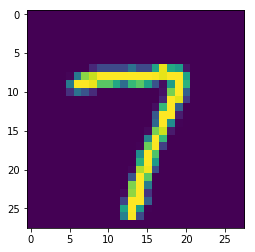

In [10]:
plt.imshow(mnist.train.images[100].reshape(28, 28))

In [11]:
sess = tf.InteractiveSession()

In [12]:
sess

In [13]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [14]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [15]:
sess.run(tf.global_variables_initializer())

In [16]:
y = tf.matmul(x,W) + b

In [17]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [18]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [19]:
train_step

<tf.Operation 'GradientDescent' type=NoOp>

In [24]:
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [25]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.91930014